In [166]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

EDA

In [167]:
red_wine = pd.read_csv(r'C:\Users\angel\OneDrive\Documentos\DATA_SCIENCE\Bootcamp\ML_WineQuality\data\winequality-red.csv', delimiter=';')
white_wine = pd.read_csv(r'C:\Users\angel\OneDrive\Documentos\DATA_SCIENCE\Bootcamp\ML_WineQuality\data\winequality-white.csv', delimiter=';')

In [168]:
# Mostrar las primeras filas para confirmación
print("Primeras filas del vino tinto:")
print(red_wine.head())

print("\nPrimeras filas del vino blanco:")
print(white_wine.head())

Primeras filas del vino tinto:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8 

In [169]:
# Configurar estilo para gráficos
sns.set(style="whitegrid")

In [170]:
# Mostrar las primeras filas de ambos datasets
print("Red Wine Dataset:")
print(red_wine.head())

print("\nWhite Wine Dataset:")
print(white_wine.head())

# Información general
print("Red Wine Dataset Info:")
red_wine.info()

print("\nWhite Wine Dataset Info:")
white_wine.info()

Red Wine Dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2 

In [171]:
# Estadísticas descriptivas
print("Red Wine Dataset Descriptive Statistics:")
print(red_wine.describe())

print("\nWhite Wine Dataset Descriptive Statistics:")
print(white_wine.describe())

Red Wine Dataset Descriptive Statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min    

C:\Users\angel\AppData\Local\Temp\ipykernel_7912\3981658530.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=red_wine, palette='coolwarm')
C:\Users\angel\AppData\Local\Temp\ipykernel_7912\3981658530.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=white_wine, palette='coolwarm')


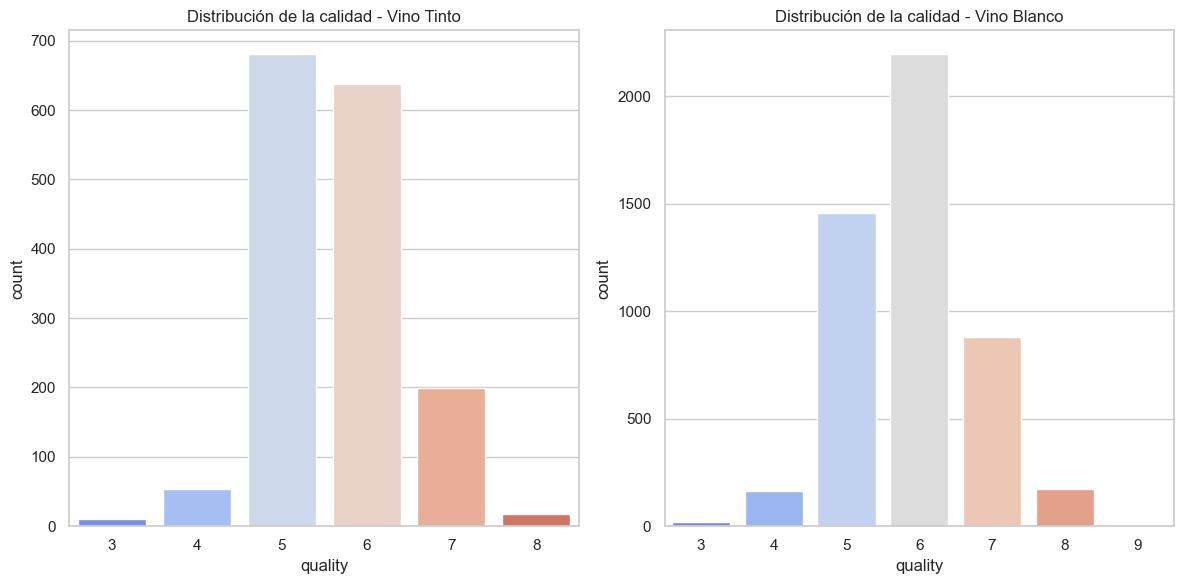

In [172]:
# Visualización de la distribución de la calidad
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='quality', data=red_wine, palette='coolwarm')
plt.title('Distribución de la calidad - Vino Tinto')

plt.subplot(1, 2, 2)
sns.countplot(x='quality', data=white_wine, palette='coolwarm')
plt.title('Distribución de la calidad - Vino Blanco')

plt.tight_layout()
plt.show()

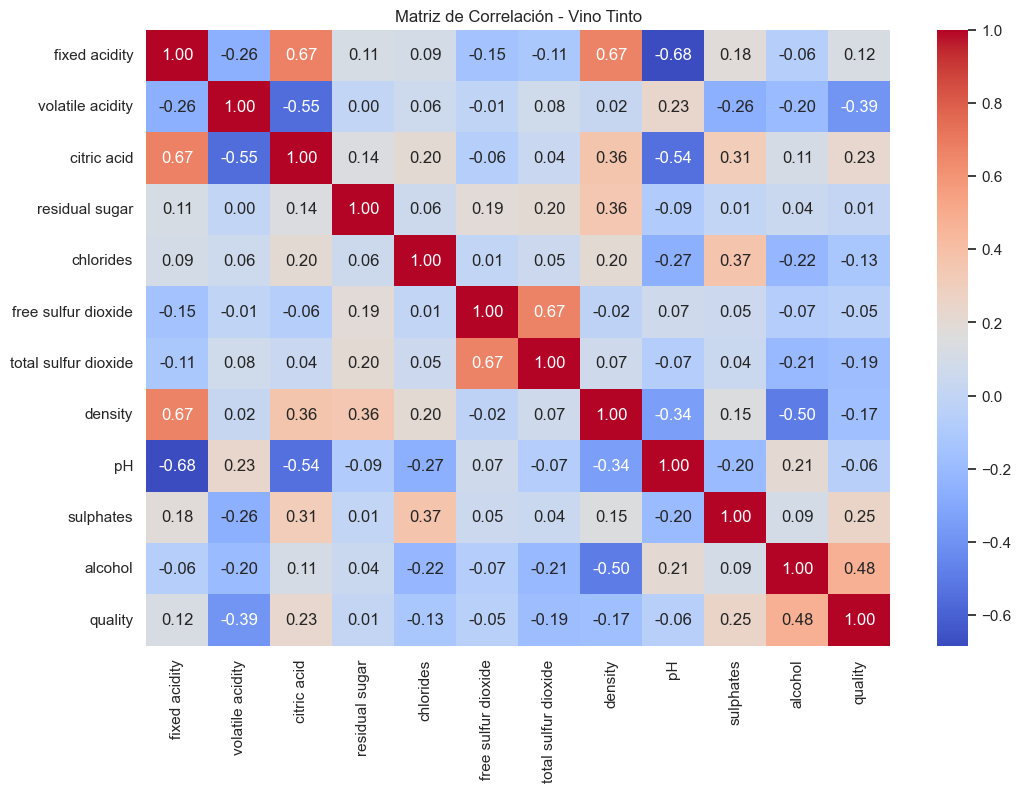

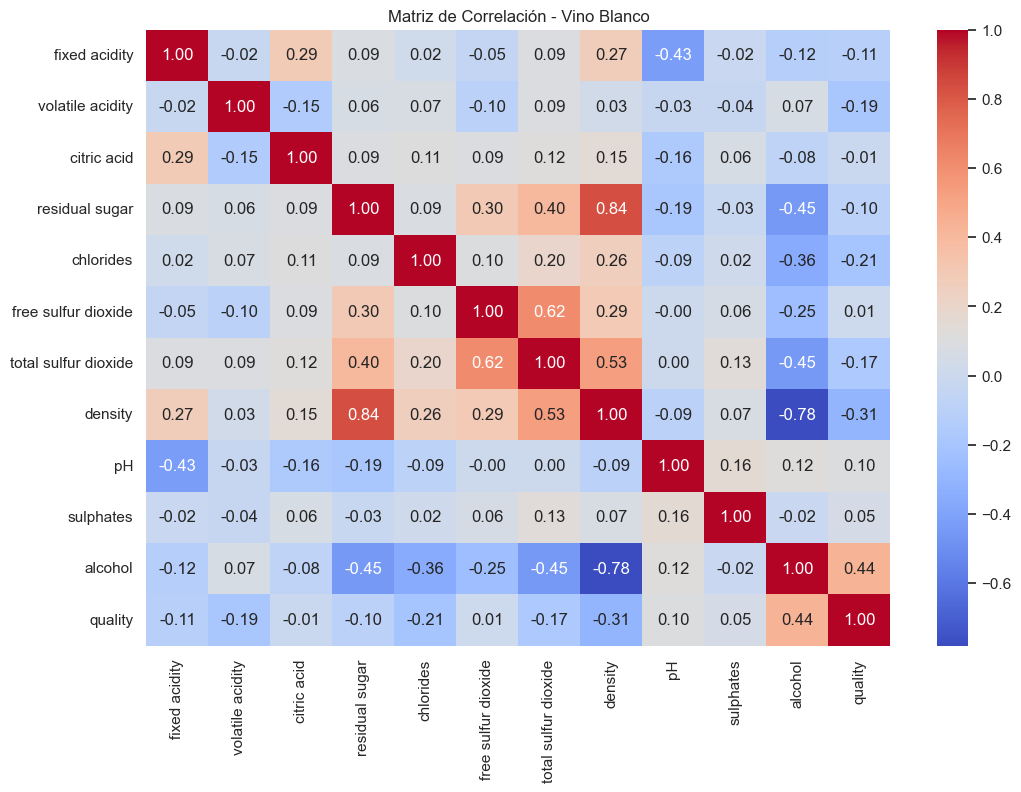

In [173]:
# Matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(red_wine.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación - Vino Tinto')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(white_wine.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación - Vino Blanco')
plt.show()

PREPROCESAMIENTO

In [174]:
# Dividir en características y etiquetas
X_red = red_wine.drop('quality', axis=1)
y_red = red_wine['quality']

X_white = white_wine.drop('quality', axis=1)
y_white = white_wine['quality']

# Dividir en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.2, random_state=42)
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_red = scaler.fit_transform(X_train_red)
X_test_red = scaler.transform(X_test_red)

X_train_white = scaler.fit_transform(X_train_white)
X_test_white = scaler.transform(X_test_white)

# Mostrar los tamaños de los conjuntos
print(f"Vino Tinto - Train size: {X_train_red.shape}, Test size: {X_test_red.shape}")
print(f"Vino Blanco - Train size: {X_train_white.shape}, Test size: {X_test_white.shape}")


Vino Tinto - Train size: (1279, 11), Test size: (320, 11)
Vino Blanco - Train size: (3918, 11), Test size: (980, 11)


ENTRENAMIENTO DEL MODELO

In [175]:
# Modelo para vino tinto
model_red = RandomForestRegressor(random_state=42)
model_red.fit(X_train_red, y_train_red)

# Hacer predicciones para el vino tinto
y_pred_red = model_red.predict(X_test_red)

# Evaluar el modelo para el vino tinto
mse_red = mean_squared_error(y_test_red, y_pred_red)
r2_red = r2_score(y_test_red, y_pred_red)

print(f"Vino Tinto - MSE: {mse_red}")
print(f"Vino Tinto - R2: {r2_red}")

# Modelo para vino blanco
model_white = RandomForestRegressor(random_state=42)
model_white.fit(X_train_white, y_train_white)

# Hacer predicciones para el vino blanco
y_pred_white = model_white.predict(X_test_white)

# Evaluar el modelo para el vino blanco
mse_white = mean_squared_error(y_test_white, y_pred_white)
r2_white = r2_score(y_test_white, y_pred_white)

print(f"Vino Blanco - MSE: {mse_white}")
print(f"Vino Blanco - R2: {r2_white}")


Vino Tinto - MSE: 0.3006603124999999
Vino Tinto - R2: 0.5399271357910311
Vino Blanco - MSE: 0.3482283673469388
Vino Blanco - R2: 0.5503674032406387


GUARDAR EL MODELO

In [176]:
# Guardar los modelos entrenados
joblib.dump(model_red, 'src/models/model_red_wine.pkl')
joblib.dump(model_white, 'src/models/model_white_wine.pkl')

print("Modelos guardados exitosamente.")

Modelos guardados exitosamente.


EVALUACION DEL MODELO

In [177]:
# Cargar los modelos previamente guardados
model_red = joblib.load('src/models/model_red_wine.pkl')
model_white = joblib.load('src/models/model_white_wine.pkl')

# Ejemplo ficticio de datos de prueba
test_data = np.array([[7.8, 0.8, 0.0, 2.0, 0.080, 12.0, 35.0, 0.998, 3.60, 0.60, 9.6]])

# Predicción para vino tinto y vino blanco
prediction_white_test = model_white.predict(test_data)
prediction_red_test = model_red.predict(test_data)

print(f"Predicción calidad vino blanco (test): {prediction_white_test}")
print(f"Predicción calidad vino tinto (test): {prediction_red_test}")


Predicción calidad vino blanco (test): [6.84]
Predicción calidad vino tinto (test): [6.33]


CONCLUSIONES Y ANALISIS DE RESULTADOS

In [178]:
# Conclusiones
print("Conclusiones:")
print(f"Vino Tinto - MSE: {mse_red}, R2: {r2_red}")
print(f"Vino Blanco - MSE: {mse_white}, R2: {r2_white}")
print("\nEl modelo ha mostrado un rendimiento razonable para predecir la calidad de los vinos. Aunque no es un modelo perfecto, los resultados sugieren que el modelo RandomForest puede ser útil para este tipo de predicciones.")


Conclusiones:
Vino Tinto - MSE: 0.3006603124999999, R2: 0.5399271357910311
Vino Blanco - MSE: 0.3482283673469388, R2: 0.5503674032406387

El modelo ha mostrado un rendimiento razonable para predecir la calidad de los vinos. Aunque no es un modelo perfecto, los resultados sugieren que el modelo RandomForest puede ser útil para este tipo de predicciones.


Interpretación de los Resultados:
Vino Tinto:

MSE (0.3007): El modelo tiene un error moderado en sus predicciones para el vino tinto.

R² (0.5399): El modelo explica aproximadamente el 54% de la variabilidad en los datos, lo que indica que el modelo tiene un rendimiento razonable, pero hay margen para mejorar. Un R² cercano a 0.5 sugiere que el modelo está proporcionando un ajuste moderado, aunque no perfecto.

Vino Blanco:

MSE (0.3482): El modelo tiene un error ligeramente mayor en las predicciones para el vino blanco en comparación con el vino tinto.

R² (0.5504): El modelo explica aproximadamente el 55% de la variabilidad en la calidad del vino blanco. Similar al vino tinto, esto sugiere un rendimiento moderado.

Conclusiones generales:
Ambos modelos (tinto y blanco) tienen un rendimiento aceptable, pero no son perfectos. Aunque el R² está alrededor del 50%, lo cual indica que los modelos explican una parte considerable de la variabilidad, también sugieren que hay factores adicionales que el modelo no está capturando.

Los MSE son bastante pequeños, pero aún se puede mejorar el modelo.

¿Cómo mejorar estos resultados?
Más características: Tal vez agregar más características relevantes podría mejorar el modelo.

Optimización del modelo: Ajustar los hiperparámetros del modelo de RandomForestRegressor podría mejorar su rendimiento.

Otras técnicas: Podrías probar con otros modelos como XGBoost, SVMs, o Redes Neuronales para ver si pueden proporcionar un mejor ajuste.